In [1]:
import pandas as pd
df = pd.read_csv('dataset/Housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [2]:
print(df.isnull().sum())
df.fillna(df.select_dtypes(include = 'number').mean(), inplace = True)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [3]:
def yes_or_no(value):
    return 1 if value == "yes" else 0
df['mainroad'] = df['mainroad'].apply(yes_or_no)
df['guestroom'] = df['guestroom'].apply(yes_or_no)
df['basement'] = df['basement'].apply(yes_or_no)
df['hotwaterheating'] = df['hotwaterheating'].apply(yes_or_no)
df['airconditioning'] = df['airconditioning'].apply(yes_or_no)
df['prefarea'] = df['prefarea'].apply(yes_or_no)

In [4]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['furnishingstatus'] = lb.fit_transform(df['furnishingstatus'])

In [19]:
Q1 = df['price'].quantile(0.25) 
Q3 = df['price'].quantile(0.75)  
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(f"Dataset after removing outliers: {df.shape}")

Dataset after removing outliers: (530, 13)


In [20]:
x = df.drop(columns = ['price'])
y = df['price']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
y_predict = rf_model.predict(x_test)

In [24]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

In [25]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 860052.0644654088
Mean Squared Error: 1255923177025.4617
Root Mean Squared Error: 1120679.7834463962
R² Score: 0.637291066813088


In [26]:
print(f'✅ Model Accuracy (R2 Score): {r2 * 100:.2f}%')
print(f'📉 Mean Squared Error: {mse:.2f}')

✅ Model Accuracy (R2 Score): 63.73%
📉 Mean Squared Error: 1255923177025.46


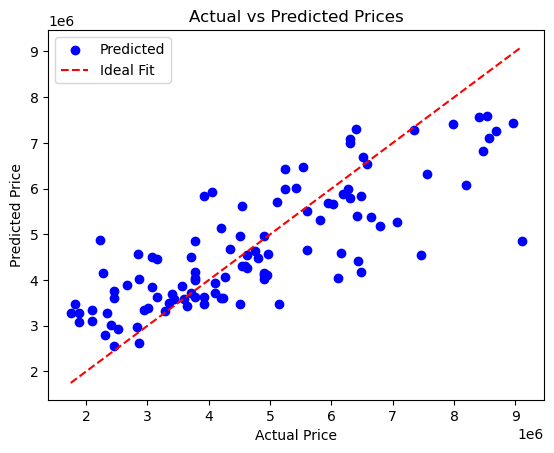

In [27]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, color='blue', label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Actual vs Predicted Prices")
plt.show()

In [28]:
print("\nActual vs Predicted Prices:")
for actual, predicted in zip(y_test.values[:10], y_predict[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual vs Predicted Prices:
Actual: 5530000, Predicted: 6481755.0
Actual: 3430000, Predicted: 3580850.0
Actual: 8680000, Predicted: 7264705.0
Actual: 3780000, Predicted: 4174100.0
Actual: 3920000, Predicted: 3472591.5
Actual: 6300000, Predicted: 5793480.0
Actual: 4585000, Predicted: 4299750.0
Actual: 2520000, Predicted: 2933840.0
Actual: 1890000, Predicted: 3282650.0
Actual: 6020000, Predicted: 5667445.0
